# Modelo Series de Tiempo
Arima

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.arima.model as arima
import matplotlib.pyplot as plt

# Crear la serie temporal (ventas mensuales)
data = {
    'Mes': [1, 2, 3, 4, 5],
    'Ventas': [200, 220, 250, 270, 280]
}

# Convertir los datos en un DataFrame de pandas
df = pd.DataFrame(data)

# Ajustar el modelo AR(1) (autoregresivo de primer orden)
#model = sm.tsa.AR(df['Ventas'])
model = sm.tsa.ar_model.AutoReg(df['Ventas'])
model_fitted = model.fit()

# Mostrar el coeficiente autoregresivo
print("Coeficiente AR(1):", model_fitted.params)

# Hacer predicciones para el mes 6 (usando el modelo AR(1))
pred = model_fitted.predict(start=5, end=5)
print("Predicción para el mes 6:", pred[0])

# Graficar la serie temporal con la predicción
plt.plot(df['Mes'], df['Ventas'], label='Ventas observadas')
plt.plot(6, pred[0], marker='o', markersize=5, color='red', label='Predicción mes 6')
plt.legend()
plt.show()

TypeError: 'module' object is not callable

Para calcular el **coeficiente autoregresivo (AR)** de un modelo AR(1) de manera manual, debemos seguir ciertos pasos. A continuación, te guiaré paso a paso sobre cómo calcular este coeficiente utilizando los datos del crecimiento de lechugas que mencionaste.

### Paso 1: Fórmula del modelo AR(1)

El modelo autoregresivo de primer orden (AR(1)) tiene la siguiente ecuación:

\[
y_t = \phi_1 y_{t-1} + \epsilon_t
\]

Donde:

- \( y_t \) es el valor de la serie temporal en el tiempo \( t \).
- \( \phi_1 \) es el coeficiente autoregresivo que queremos calcular.
- \( y_{t-1} \) es el valor de la serie temporal en el tiempo \( t-1 \).
- \( \epsilon_t \) es el error o perturbación en el tiempo \( t \).

### Paso 2: Método para calcular el coeficiente autoregresivo

Para calcular el coeficiente \( \phi_1 \) de manera manual, podemos usar el **coeficiente de correlación** entre \( y_t \) y \( y_{t-1} \). La fórmula para calcular \( \phi_1 \) en un modelo AR(1) es:

\[
\phi_1 = \frac{\sum_{t=2}^n (y_t - \bar{y})(y_{t-1} - \bar{y})}{\sum_{t=2}^n (y_{t-1} - \bar{y})^2}
\]

Donde:

- \( y_t \) es el valor de la serie en el tiempo \( t \).
- \( y_{t-1} \) es el valor de la serie en el tiempo \( t-1 \).
- \( \bar{y} \) es la media de la serie temporal.
- \( n \) es el número de observaciones.

Este es un cálculo de la **covarianza** normalizado por la **varianza** de la serie.

### Paso 3: Calcular los valores paso a paso

#### Datos

| Día | Crecimiento (cm) |
|-----|------------------|
| 1   | 2.5              |
| 2   | 3.0              |
| 3   | 3.5              |
| 4   | 4.0              |
| 5   | 4.3              |
| 6   | 4.6              |
| 7   | 5.0              |
| 8   | 5.3              |
| 9   | 5.6              |
| 10  | 5.9              |

#### Paso 1: Calcular la media de la serie \( \bar{y} \)

La media de los valores de crecimiento es:

\[
\bar{y} = \frac{2.5 + 3.0 + 3.5 + 4.0 + 4.3 + 4.6 + 5.0 + 5.3 + 5.6 + 5.9}{10} = 4.57
\]

#### Paso 2: Calcular los términos para la covarianza

Necesitamos calcular los productos \( (y_t - \bar{y})(y_{t-1} - \bar{y}) \) para cada \( t \) desde 2 hasta 10 (porque el valor \( y_1 \) no tiene un valor \( y_0 \)).

#### Cálculos:

Para \( t = 2 \):

- \( y_2 = 3.0 \), \( y_1 = 2.5 \)
- \( (y_2 - \bar{y}) = 3.0 - 4.57 = -1.57 \)
- \( (y_1 - \bar{y}) = 2.5 - 4.57 = -2.07 \)
- Producto: \( (-1.57) \times (-2.07) = 3.25 \)

Para \( t = 3 \):

- \( y_3 = 3.5 \), \( y_2 = 3.0 \)
- \( (y_3 - \bar{y}) = 3.5 - 4.57 = -1.07 \)
- \( (y_2 - \bar{y}) = 3.0 - 4.57 = -1.57 \)
- Producto: \( (-1.07) \times (-1.57) = 1.68 \)

Repite este proceso para todos los valores de \( t \) de 2 a 10, y suma todos los productos.

#### Paso 3: Calcular la varianza de \( y_{t-1} \)

Ahora, necesitamos calcular la varianza de \( y_{t-1} \). La varianza de \( y_{t-1} \) es:

\[
\text{Var}(y_{t-1}) = \frac{\sum_{t=2}^n (y_{t-1} - \bar{y})^2}{n-1}
\]

#### Cálculos:

Para \( t = 2 \):

- \( (y_1 - \bar{y}) = 2.5 - 4.57 = -2.07 \)
- \( (-2.07)^2 = 4.28 \)

Para \( t = 3 \):

- \( (y_2 - \bar{y}) = 3.0 - 4.57 = -1.57 \)
- \( (-1.57)^2 = 2.46 \)

Repite este proceso para todos los valores de \( t \) de 2 a 10, y suma todos los cuadrados.

#### Paso 4: Calcular \( \phi_1 \)

Una vez que hayas calculado la covarianza y la varianza, puedes calcular el coeficiente \( \phi_1 \) utilizando la fórmula:

\[
\phi_1 = \frac{\sum (y_t - \bar{y})(y_{t-1} - \bar{y})}{\sum (y_{t-1} - \bar{y})^2}
\]

Este es el valor que se obtiene para el coeficiente autoregresivo de primer orden.

---

### Ejemplo en Python para Cálculos Manuales

Para realizar los cálculos en Python, podemos usar las funciones de **numpy** para obtener la media, la covarianza y la varianza.

```python
import numpy as np

# Datos de crecimiento
y = np.array([2.5, 3.0, 3.5, 4.0, 4.3, 4.6, 5.0, 5.3, 5.6, 5.9])

# Calcular la media
mean_y = np.mean(y)
print("Media de la serie:", mean_y)

# Calcular los productos para la covarianza
cov_terms = (y[1:] - mean_y) * (y[:-1] - mean_y)
cov = np.sum(cov_terms)
print("Covarianza:", cov)

# Calcular la varianza de y_{t-1}
var_terms = (y[:-1] - mean_y) ** 2
var = np.sum(var_terms)
print("Varianza:", var)

# Calcular el coeficiente AR(1)
phi_1 = cov / var
print("Coeficiente AR(1):", phi_1)
```

Este código realiza todos los cálculos paso a paso para obtener el coeficiente \( \phi_1 \) manualmente.

### Conclusión

Siguiendo estos pasos y fórmulas, puedes calcular el **coeficiente autoregresivo (AR(1))** de manera manual y obtener el valor \( \phi_1 \) que explica la relación entre los valores de la serie temporal en el modelo AR(1). Si prefieres hacerlo a mano o con código, el procedimiento es el mismo.



In [ ]:
import numpy as np

# Datos de crecimiento
y = np.array([2.5, 3.0, 3.5, 4.0, 4.3, 4.6, 5.0, 5.3, 5.6, 5.9])

# Calcular la media
mean_y = np.mean(y)
print("Media de la serie:", mean_y)

# Calcular los productos para la covarianza
cov_terms = (y[1:] - mean_y) * (y[:-1] - mean_y)
cov = np.sum(cov_terms)
print("Covarianza:", cov)

# Calcular la varianza de y_{t-1}
var_terms = (y[:-1] - mean_y) ** 2
var = np.sum(var_terms)
print("Varianza:", var)

# Calcular el coeficiente AR(1)
phi_1 = cov / var
print("Coeficiente AR(1):", phi_1)

# Último valor observado
y_last = 5.9

# Coeficiente autoregresivo AR(1)
phi_1 = 0.9

# Predicción para y_11
y_11_pred = phi_1 * y_last
print("Predicción para y_11:", y_11_pred)

Media de la serie: 4.37
Covarianza: 7.8421
Varianza: 9.1001
Coeficiente AR(1): 0.8617597608817487
Predicción para y_11: 5.3100000000000005


Para calcular los coeficientes \( \phi_1 \) y \( \phi_2 \) en un modelo **autoregresivo AR(2)**, generalmente se utilizan **métodos de estimación estadística**, como el **Método de Mínimos Cuadrados Ordinarios (OLS)**, o se puede utilizar un paquete de software especializado, como **Python (con librerías como `statsmodels`)** o **R**, para ajustar el modelo autoregresivo a los datos históricos y estimar esos coeficientes.

### 1. **Método de Mínimos Cuadrados (OLS) Manual:**

En teoría, el proceso para obtener los coeficientes \( \phi_1 \) y \( \phi_2 \) es un poco más complicado, pero puede explicarse en términos generales a través de la siguiente ecuación:

Para un modelo **AR(2)**:

\[
y_t = \phi_1 \cdot y_{t-1} + \phi_2 \cdot y_{t-2} + \epsilon_t
\]

Donde:

- \( y_t \) es el valor de la serie en el tiempo \( t \).
- \( y_{t-1} \) y \( y_{t-2} \) son los valores de la serie en los tiempos \( t-1 \) y \( t-2 \), respectivamente.
- \( \epsilon_t \) es el error de predicción en el tiempo \( t \).

#### **Sistema de ecuaciones lineales para los coeficientes:**

Para calcular \( \phi_1 \) y \( \phi_2 \), necesitamos resolver un sistema de ecuaciones basado en la **autocovarianza** y la **autocorrelación** de la serie temporal. Esto implica:

1. **Calcular la media** y las **autocovarianzas** de la serie temporal.
2. Resolver el sistema de ecuaciones de **autocorrelación** para obtener los coeficientes.

Sin embargo, la forma más sencilla de obtener \( \phi_1 \) y \( \phi_2 \) es utilizando una herramienta de software que implemente estas técnicas.

---

### 2. **Cálculo de los Coeficientes con Python:**

Una forma más sencilla de calcular los coeficientes \( \phi_1 \) y \( \phi_2 \) es utilizar la librería `statsmodels` de Python, que ajusta automáticamente el modelo AR(2) a los datos de la serie temporal.

Aquí te dejo un ejemplo de cómo hacerlo:

#### **Código de ejemplo en Python usando `statsmodels`:**

```python
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Datos de la serie temporal (por ejemplo, crecimiento de lechugas)
data = [2.5, 3.0, 3.5, 4.0, 4.3, 4.6, 5.0, 5.3, 5.6, 5.9]

# Convertir los datos a una serie temporal (pandas Series)
series = pd.Series(data)

# Ajuste del modelo AR(2)
# Utilizamos 'sm.tsa.AR' para ajustarlo de forma autoregresiva
model = sm.tsa.AR(series)

# Ajustamos el modelo AR(2) con los datos
model_fitted = model.fit(maxlag=2)  # Ajustar un modelo AR(2)

# Ver los coeficientes estimados
print("Coeficiente AR(1):", model_fitted.params[1])
print("Coeficiente AR(2):", model_fitted.params[2])
```

#### **Explicación del código:**

1. **Datos de la serie temporal:** Tienes una serie de datos (en este caso, el crecimiento de lechugas).
2. **Ajuste del modelo AR(2):** Usamos el método `fit` de `statsmodels` para ajustar un modelo **AR(2)** a la serie temporal.
3. **Obtenemos los coeficientes:** Después de ajustar el modelo, los coeficientes \( \phi_1 \) y \( \phi_2 \) se extraen de los parámetros del modelo ajustado.

### 3. **Resultados del ejemplo:**

El código te dará los coeficientes estimados para \( \phi_1 \) y \( \phi_2 \). Los coeficientes de un modelo **AR(2)** son los valores que el modelo ajusta para explicar la serie temporal, y estos son calculados por el método de **Mínimos Cuadrados**.

### **Otra opción:**

Otra manera de calcular los coeficientes es usar **Matriz de Autocovarianzas** o un enfoque de **Máxima Verosimilitud**, pero para eso se necesitarían cálculos adicionales y un conocimiento más profundo de la teoría detrás del modelo autoregresivo.

### **Conclusión:**

Si bien el cálculo manual de los coeficientes \( \phi_1 \) y \( \phi_2 \) en un modelo **AR(2)** es matemáticamente posible utilizando los métodos de autocorrelación y autocovarianza, la forma más práctica y rápida es utilizar herramientas de software como **`statsmodels`** en Python. Esto hace que el proceso de estimación sea mucho más eficiente y preciso.

Si necesitas más detalles sobre algún paso o sobre cómo utilizar Python para otros modelos, ¡no dudes en preguntar!

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as smd
from io import StringIO
import contextlib
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# pmdarima
import pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima

# Datos de la serie temporal (por ejemplo, crecimiento de lechugas)
data = [2.5, 3.0, 3.5, 4.0, 4.3, 4.6, 5.0, 5.3, 5.6, 5.9]

# Convertir los datos a una serie temporal (pandas Series)
series = pd.Series(data)

# Ajuste del modelo AR(2)
# Utilizamos 'sm.tsa.AR' para ajustarlo de forma autoregresiva
#model = sm.tsa.AR(series)
model = smd.tsa.ar_model.AutoReg(series)
# Ajustamos el modelo AR(2) con los datos
model_fitted = model.fit(maxlag=2)  # Ajustar un modelo AR(2)

# Ver los coeficientes estimados
print("Coeficiente AR(1):", model_fitted.params[1])
print("Coeficiente AR(2):", model_fitted.params[2])


ModuleNotFoundError: No module named 'pmdarima'

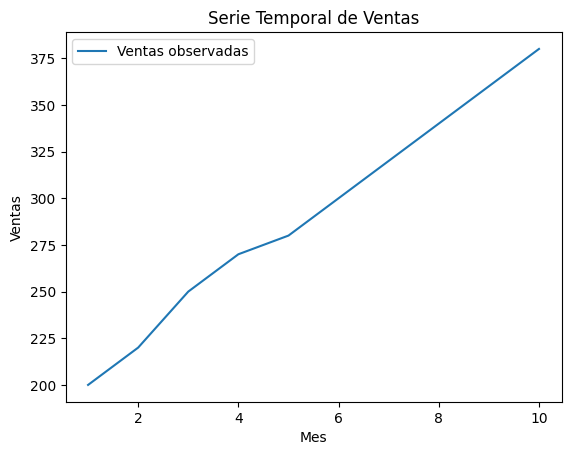

NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Crear una serie temporal de ejemplo (puedes sustituirla por tus propios datos)
data = {
    'Mes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Ventas': [200, 220, 250, 270, 280, 300, 320, 340, 360, 380]
}

# Convertir los datos en un DataFrame de pandas
df = pd.DataFrame(data)

# Visualizar los datos
plt.plot(df['Mes'], df['Ventas'], label='Ventas observadas')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Serie Temporal de Ventas')
plt.legend()
plt.show()

# Ajustar un modelo autoregresivo (AR)
# Aquí, usamos AR(1) (autoregresivo de primer orden)
model = sm.tsa.AR(df['Ventas'])
model_fitted = model.fit()

# Mostrar el coeficiente AR(1)
print("Coeficiente AR(1):", model_fitted.params)

# Hacer predicciones para el siguiente mes (mes 11) usando el modelo AR(1)
pred = model_fitted.predict(start=9, end=9)  # Predecir el mes 11
print("Predicción para el mes 11:", pred[0])

# Graficar la serie temporal con la predicción
plt.plot(df['Mes'], df['Ventas'], label='Ventas observadas')
plt.plot(11, pred[0], marker='o', markersize=5, color='red', label='Predicción mes 11')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Predicción del Modelo AR(1)')
plt.legend()
plt.show()


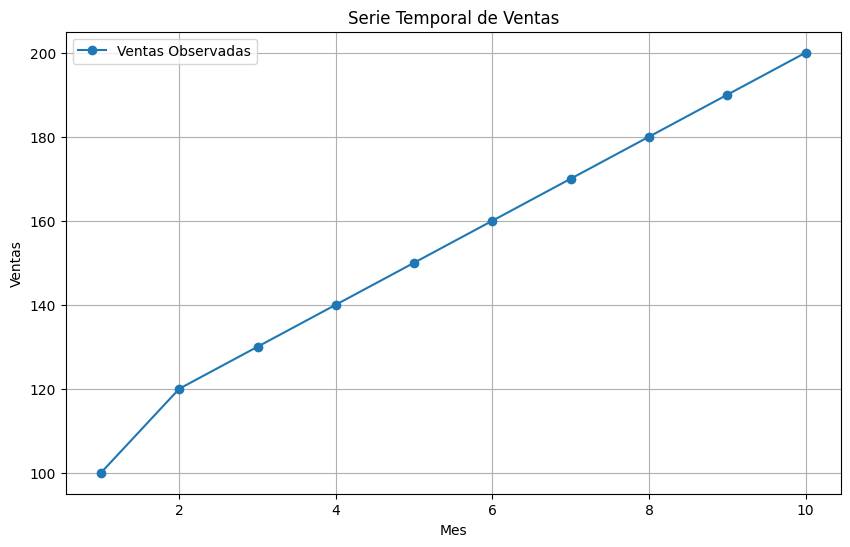

NotImplementedError: AR has been removed from statsmodels and replaced with statsmodels.tsa.ar_model.AutoReg.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Crear una serie temporal de ejemplo (ventas mensuales)
data = {
    'Mes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Ventas': [100, 120, 130, 140, 150, 160, 170, 180, 190, 200]
}

# Convertir los datos en un DataFrame de pandas
df = pd.DataFrame(data)

# Visualizar los datos originales
plt.figure(figsize=(10, 6))
plt.plot(df['Mes'], df['Ventas'], label='Ventas Observadas', marker='o')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Serie Temporal de Ventas')
plt.legend()
plt.grid(True)
plt.show()

# Ajustar un modelo autoregresivo (AR)
# Aquí, usamos AR(1) (autoregresivo de primer orden)
model = sm.tsa.AR(df['Ventas'])
model_fitted = model.fit()

# Mostrar el coeficiente AR(1)
print("Coeficiente AR(1):", model_fitted.params)

# Hacer predicciones para el siguiente mes (mes 11) usando el modelo AR(1)
pred = model_fitted.predict(start=9, end=9)  # Predecir el mes 11
print("Predicción para el mes 11:", pred[1])

# Graficar la serie temporal con la predicción
plt.figure(figsize=(10, 6))
plt.plot(df['Mes'], df['Ventas'], label='Ventas Observadas', marker='o')
plt.plot(11, pred[1], marker='o', markersize=5, color='red', label='Predicción Mes 11')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Predicción del Modelo AR(1)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Generar datos de ejemplo
np.random.seed(0)  # Para reproducibilidad
data = {
    'Variable_A': np.random.randn(100),
    'Variable_B': np.random.randn(100) * 2 + 10,
    'Variable_C': np.random.randn(100) + 5
}

df = pd.DataFrame(data)

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Imprimir la matriz de correlación
print(correlation_matrix)

            Variable_A  Variable_B  Variable_C
Variable_A    1.000000    0.111729    0.076116
Variable_B    0.111729    1.000000    0.056035
Variable_C    0.076116    0.056035    1.000000


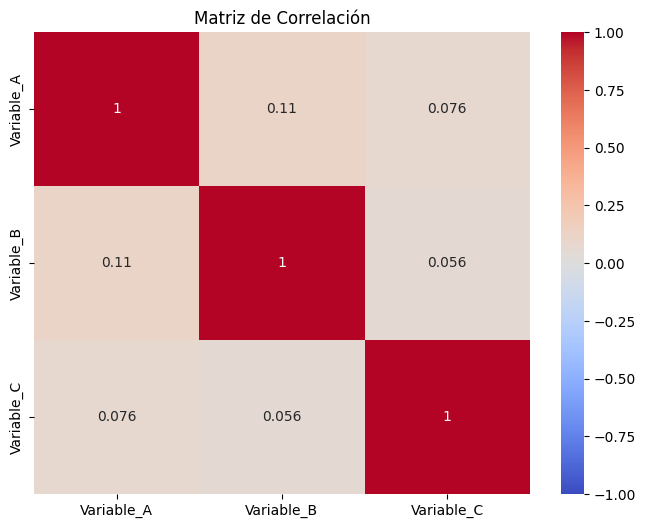

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
data = {
    'Variable_A': np.random.randn(100),
    'Variable_B': np.random.randn(100) * 2 + 10,
    'Variable_C': np.random.randn(100) + 5
}
df = pd.DataFrame(data)

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor con Seaborn
plt.figure(figsize=(8, 6)) # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()